In [2]:
import pandas as pd

# Tải dataset từ file CSV
df = pd.read_csv('/content/IMDB-Dataset.csv')

# Loại bỏ các hàng trùng lặp
df = df.drop_duplicates()


In [4]:
pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.4 MB/s eta 0:00:00


In [6]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions
import pandas as pd

# Đảm bảo bạn đã tải các gói dữ liệu cần thiết
nltk.download('stopwords')
nltk.download('wordnet')

# Tập hợp các từ dừng
stop = set(stopwords.words('english'))

# Mở rộng các từ viết tắt
def expand_contractions(text):
    return contractions.fix(text)

# Hàm xử lý dữ liệu văn bản
def preprocess_text(text):
    wl = WordNetLemmatizer()

    # Loại bỏ các thẻ HTML
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()

    # Mở rộng từ viết tắt
    text = expand_contractions(text)

    # Biểu thức chính quy để loại bỏ biểu tượng cảm xúc
    emoji_clean = re.compile("["
                             u"\U0001F600-\U0001F64F"  # emoticons
                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             u"\U00002702-\U000027B0"
                             u"\U000024C2-\U0001F251"
                             "]+", flags=re.UNICODE)
    text = emoji_clean.sub(r'', text)

    # Thêm khoảng trắng sau dấu chấm câu
    text = re.sub(r'\.(?=\S)', '. ', text)

    # Loại bỏ URL
    text = re.sub(r'http\S+', '', text)

    # Loại bỏ dấu câu và chuyển văn bản thành chữ thường
    text = "".join([word.lower() for word in text if word not in string.punctuation])

    # Lemmatize và loại bỏ từ dừng
    text = " ".join([wl.lemmatize(word) for word in text.split() if word not in stop and word.isalpha()])

    return text

# Thay thế 'review' bằng cột văn bản mà bạn muốn xử lý
df = pd.read_csv('/content/IMDB-Dataset.csv')  # Đảm bảo đường dẫn tệp đúng
df['review'] = df['review'].apply(preprocess_text)

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-6-ec15b25931d6>:26: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


                                              review sentiment
0  one reviewer mentioned watching oz episode hoo...  positive
1  wonderful little production filming technique ...  positive
2  thought wonderful way spend time hot summer we...  positive
3  basically family little boy jake think zombie ...  negative
4  petter matteis love time money visually stunni...  positive


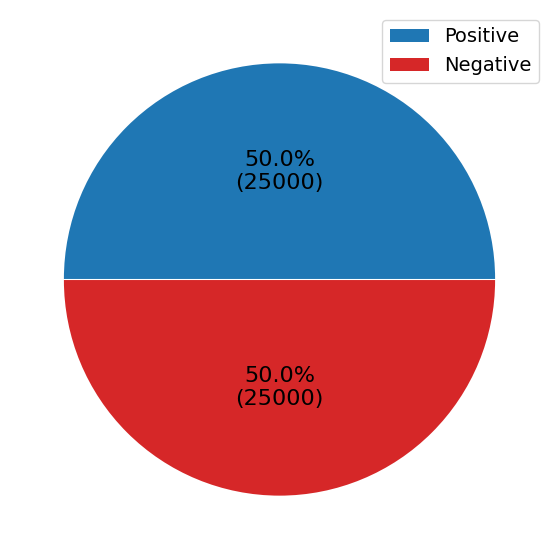

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Hàm tạo các nhãn chú thích tự động
def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Giả sử df là DataFrame có cột 'sentiment' chứa nhãn 'positive' và 'negative'
freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]
labels = ['Positive', 'Negative']

# Tạo biểu đồ tròn
fig, ax = plt.subplots(figsize=[11, 7])
plt.pie(x=data,
        autopct=lambda pct: func(pct, data),
        explode=[0.0025]*2,
        pctdistance=0.5,
        colors=[sns.color_palette()[0], 'tab:red'],
        textprops={'fontsize': 16})

# Tiêu đề (comment để không hiển thị)
# plt.title('Frequencies of sentiment labels', fontsize=14, fontweight='bold')
labels = [r'Positive', r'Negative']
# Tạo chú thích
plt.legend(labels, loc="best", prop={'size': 14})

# Lưu biểu đồ
fig.savefig("PieChart.png")

# Hiển thị biểu đồ
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


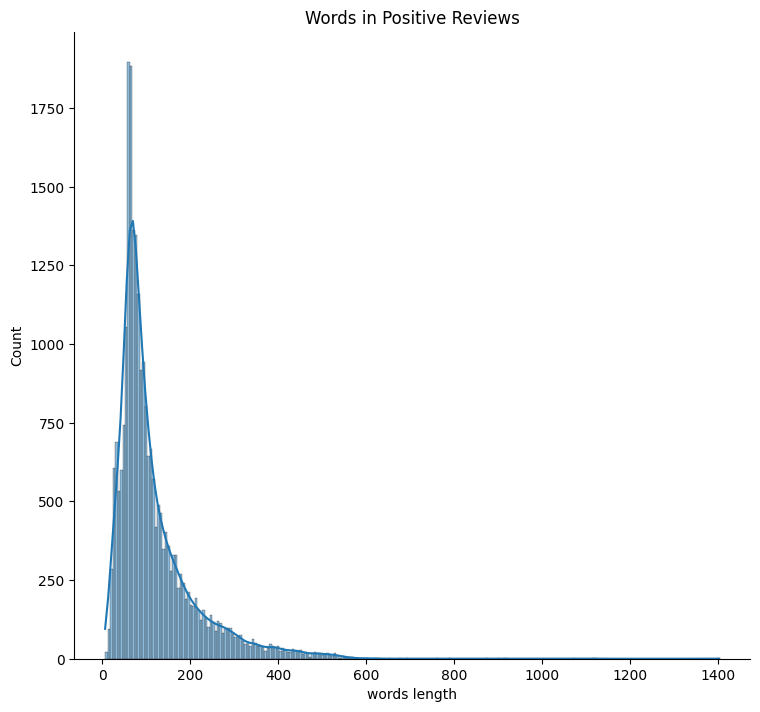

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


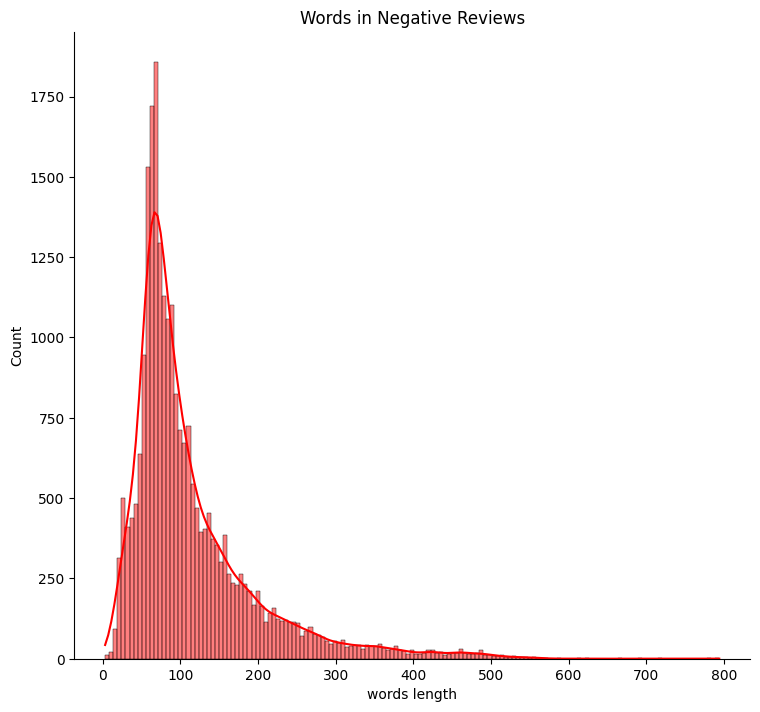

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


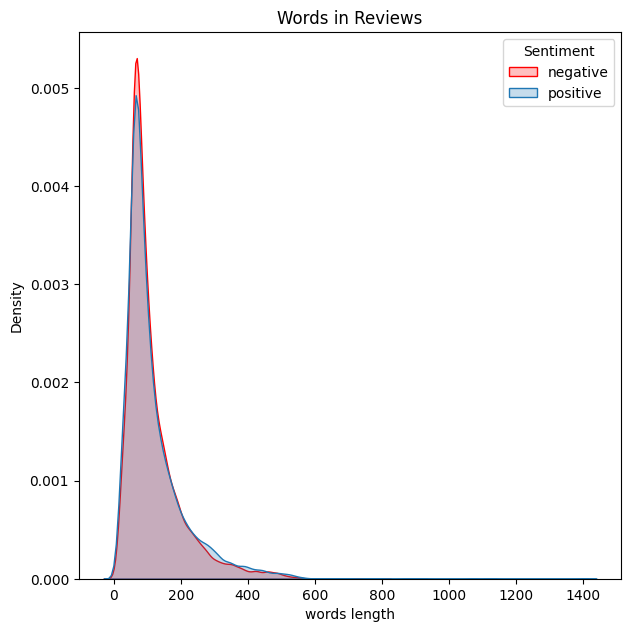

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán độ dài từ cho mỗi đánh giá
words_len = df['review'].str.split().map(lambda x: len(x))

# Tạo một bản sao của DataFrame và thêm cột độ dài từ
df_temp = df.copy()
df_temp['words length'] = words_len

# Biểu đồ phân phối cho đánh giá tích cực
hist_positive = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'positive'],
    x="words length",
    hue="sentiment",
    kde=True,
    height=7,
    aspect=1.1,
    legend=False
).set(title='Words in Positive Reviews')

# Hiển thị biểu đồ phân phối cho đánh giá tích cực
plt.show()

# Biểu đồ phân phối cho đánh giá tiêu cực
hist_negative = sns.displot(
    data=df_temp[df_temp['sentiment'] == 'negative'],
    x="words length",
    hue="sentiment",
    kde=True,
    height=7,
    aspect=1.1,
    legend=False,
    palette=['red']
).set(title='Words in Negative Reviews')

# Hiển thị biểu đồ phân phối cho đánh giá tiêu cực
plt.show()

# Biểu đồ KDE cho phân phối số lượng từ
plt.figure(figsize=(7, 7.1))
kernel_distribution_number_words_plot = sns.kdeplot(
    data=df_temp,
    x="words length",
    hue="sentiment",
    fill=True,
    palette=[sns.color_palette()[0], 'red']
).set(title='Words in Reviews')

# Thêm chú thích
plt.legend(title='Sentiment', labels=['negative', 'positive'])

# Hiển thị biểu đồ KDE
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Chuyển nhãn cảm xúc sang số
label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])

# Biến đổi văn bản thành ma trận TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
x_data = tfidf_vectorizer.fit_transform(df['review']).toarray()

# Tách dữ liệu thành tập huấn luyện và kiểm tra
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=42
)

In [16]:

# Mã hóa nhãn
label_encode = LabelEncoder()
y_data = label_encode.fit_transform(df['sentiment'])

# Chia dữ liệu ban đầu thành tập huấn luyện và tập kiểm tra
x_train_text, x_test_text, y_train, y_test = train_test_split(
    df['review'], y_data, test_size=0.2, random_state=42
)

# Tạo TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit và transform dữ liệu huấn luyện
x_train_encoded = tfidf_vectorizer.fit_transform(x_train_text.astype(str))

# Transform dữ liệu kiểm tra
x_test_encoded = tfidf_vectorizer.transform(x_test_text.astype(str))

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Khởi tạo và huấn luyện Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(x_train_encoded, y_train)

# Dự đoán trên tập kiểm tra với Decision Tree
y_pred_dt = dt_classifier.predict(x_test_encoded)

# Tính toán độ chính xác cho Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy of the Decision Tree model:", accuracy_dt)

# Khởi tạo và huấn luyện Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_encoded, y_train)

# Dự đoán trên tập kiểm tra với Random Forest
y_pred_rf = rf_classifier.predict(x_test_encoded)

# Tính toán độ chính xác cho Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy of the Random Forest model:", accuracy_rf)

Accuracy of the Decision Tree model: 0.7214
Accuracy of the Random Forest model: 0.8552
